In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_regression
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import f_regression, f_classif, chi2, mutual_info_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import SelectFromModel

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

file_path = 'Automobile_data.csv'
df = pd.read_csv(file_path, na_values="?")

df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0
201,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0
202,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0
203,-1,95.0,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    float64
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [3]:
df.isna().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [4]:
for column in ['normalized-losses', 'bore', 'stroke', 'horsepower', 'peak-rpm']:
    df[column] = df[column].fillna(df[column].mean())

df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0
201,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0
202,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0
203,-1,95.0,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0


In [5]:
df.loc[df.duplicated(), :]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price


In [6]:
df.select_dtypes(include=np.number).describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,201.000000
mean,0.834146,122.000000,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329751,3.255423,10.142537,104.256158,5125.369458,25.219512,30.751220,13207.129353
std,1.245307,31.681008,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.519211,476.979093,6.542142,6.886443,7947.066342
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,101.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,122.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,137.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,256.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [7]:
df.select_dtypes(include=np.number).corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
symboling,1.000000,0.465190,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130083,-0.008689,-0.178515,0.071389,0.273679,-0.035823,0.034606,-0.082391
normalized-losses,0.465190,1.000000,-0.056518,0.019209,0.084195,-0.370706,0.097785,0.110997,-0.029266,0.054929,-0.114525,0.203434,0.237748,-0.218749,-0.178221,0.133999
wheel-base,-0.531954,-0.056518,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488760,0.160944,0.249786,0.351957,-0.360704,-0.470414,-0.544082,0.584642
length,-0.357612,0.019209,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606462,0.129522,0.158414,0.554434,-0.287031,-0.670909,-0.704662,0.690628
width,-0.232919,0.084195,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559152,0.182939,0.181129,0.642195,-0.219859,-0.642704,-0.677218,0.751265
height,-0.541038,-0.370706,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171101,-0.055351,0.261214,-0.110137,-0.320602,-0.048640,-0.107358,0.135486
curb-weight,-0.227691,0.097785,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648485,0.168783,0.151362,0.750968,-0.266283,-0.757414,-0.797465,0.834415
engine-size,-0.105790,0.110997,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583798,0.203094,0.028971,0.810713,-0.244599,-0.653658,-0.677470,0.872335
bore,-0.130083,-0.029266,0.488760,0.606462,0.559152,0.171101,0.648485,0.583798,1.000000,-0.055909,0.005201,0.575737,-0.254761,-0.584508,-0.586992,0.543155
stroke,-0.008689,0.054929,0.160944,0.129522,0.182939,-0.055351,0.168783,0.203094,-0.055909,1.000000,0.186105,0.088264,-0.066844,-0.042179,-0.043961,0.082269


In [8]:
for column in df.select_dtypes(include='object').columns:
    print(f"'{column}' unique values {df[column].unique()}") 

'make' unique values ['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'mercedes-benz' 'mercury' 'mitsubishi' 'nissan' 'peugot'
 'plymouth' 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen'
 'volvo']
'fuel-type' unique values ['gas' 'diesel']
'aspiration' unique values ['std' 'turbo']
'num-of-doors' unique values ['two' 'four' nan]
'body-style' unique values ['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
'drive-wheels' unique values ['rwd' 'fwd' '4wd']
'engine-location' unique values ['front' 'rear']
'engine-type' unique values ['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']
'num-of-cylinders' unique values ['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']
'fuel-system' unique values ['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']


In [9]:
df = df.dropna(subset=['num-of-doors', 'price'])
df.isna().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

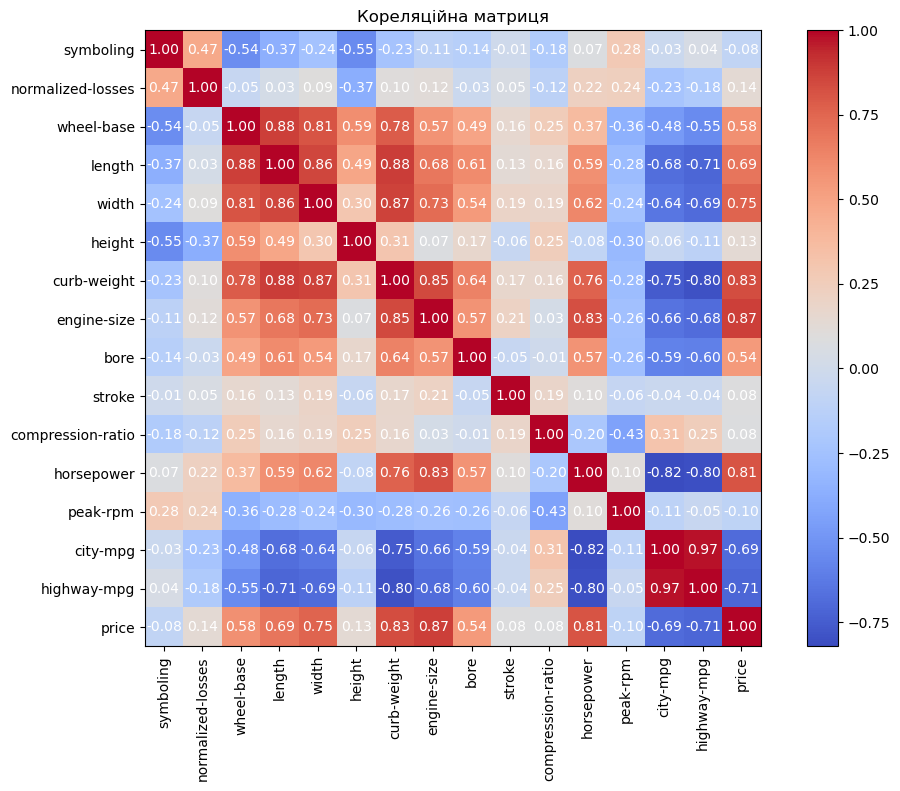

In [10]:
numeric_features = df.select_dtypes(include=['int64', 'float64']).columns
corr_matrix = df[numeric_features].corr()

plt.figure(figsize=(12, 8))
heatmap = plt.imshow(corr_matrix, cmap='coolwarm', interpolation='none')
plt.colorbar(heatmap)

plt.xticks(range(len(numeric_features)), numeric_features, rotation=90)
plt.yticks(range(len(numeric_features)), numeric_features)

for i in range(len(numeric_features)):
    for j in range(len(numeric_features)):
        plt.text(j, i, f'{corr_matrix.iloc[i, j]:.2f}', ha='center', va='center', color='w')

plt.title('Кореляційна матриця')
plt.show()

Pearson Correlation Scores:
price: 1.0000
engine-size: 0.8722
curb-weight: 0.8341
horsepower: 0.8110
width: 0.7516
highway-mpg: 0.7081
length: 0.6912
city-mpg: 0.6903
wheel-base: 0.5838
bore: 0.5426
normalized-losses: 0.1368
height: 0.1336
peak-rpm: 0.1013
stroke: 0.0843
symboling: 0.0832
compression-ratio: 0.0761

Selected Features:
Index(['width', 'curb-weight', 'engine-size', 'horsepower', 'highway-mpg'], dtype='object')


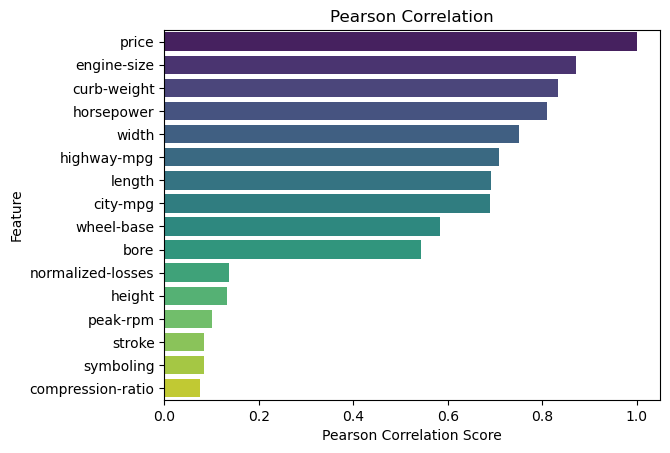

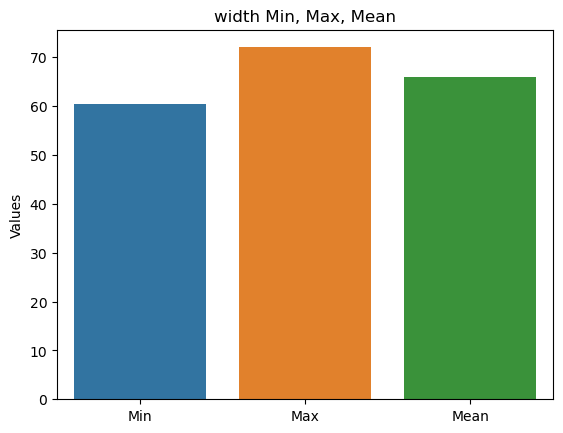

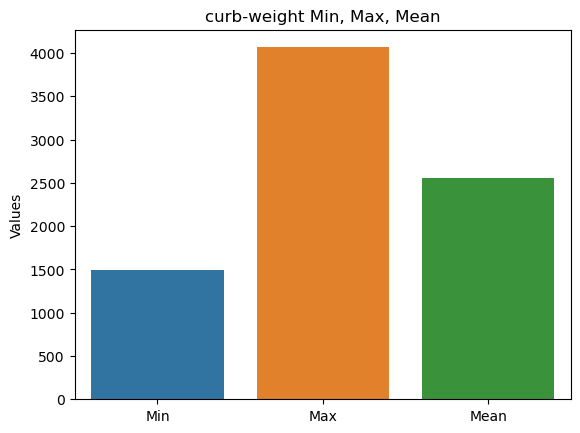

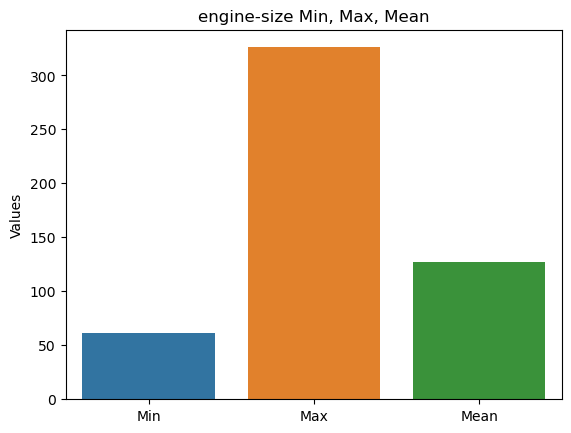

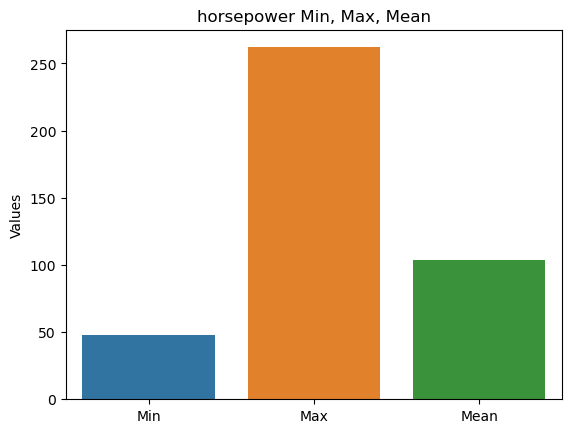

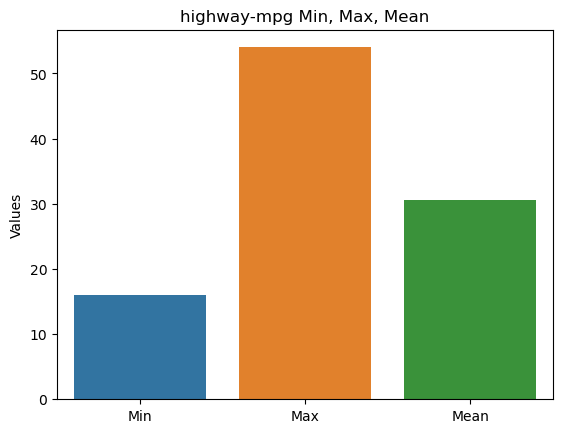

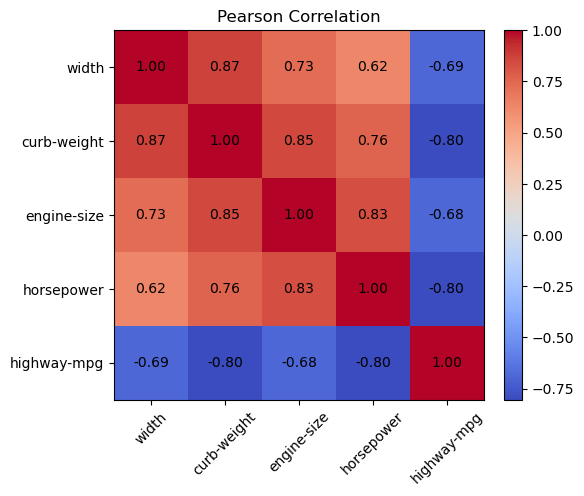

In [20]:
numerical_features = df.select_dtypes(include=np.number).columns
categorical_features = df.select_dtypes(include=['object']).columns

correlation_scores = {}
for feature in numerical_features:
    corr, _ = pearsonr(df[feature], df['price'])
    correlation_scores[feature] = abs(corr)

df_encoded = pd.get_dummies(df, columns=categorical_features, drop_first=True)

X = df_encoded.drop('price', axis=1)
y = df_encoded['price']
selector = SelectKBest(f_regression, k=5)
X_selected = selector.fit_transform(X, y)

selected_features = X.columns[selector.get_support()]

print("Pearson Correlation Scores:")
for feature, score in sorted(correlation_scores.items(), key=lambda x: x[1], reverse=True):
    print(f"{feature}: {score:.4f}")

print("\nSelected Features:")
print(selected_features)

feature_importances = pd.DataFrame({
    'Feature': correlation_scores.keys(),
    'Importance': correlation_scores.values()
})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='viridis', orient='h')
plt.title("Pearson Correlation")
plt.xlabel("Pearson Correlation Score")
plt.ylabel("Feature")
plt.show()

for feature in selected_features:
    sns.barplot(x=['Min', 'Max', 'Mean'], y=[df[feature].min(), df[feature].max(), df[feature].mean()])
    plt.title(f'{feature} Min, Max, Mean')
    plt.ylabel('Values')
    plt.show()

correlation_matrix = df[selected_features].corr()
heatmap = plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')

for i in range(len(selected_features)):
    for j in range(len(selected_features)):
        plt.text(j, i, f'{correlation_matrix.iloc[i, j]:.2f}', ha='center', va='center', color='black')

plt.title("Pearson Correlation")
plt.xticks(np.arange(len(selected_features)), selected_features, rotation=45)
plt.yticks(np.arange(len(selected_features)), selected_features)
plt.colorbar(heatmap, fraction=0.046, pad=0.04)
plt.show()

Mutual Information:
Index(['curb-weight', 'engine-size', 'horsepower', 'city-mpg', 'highway-mpg'], dtype='object')


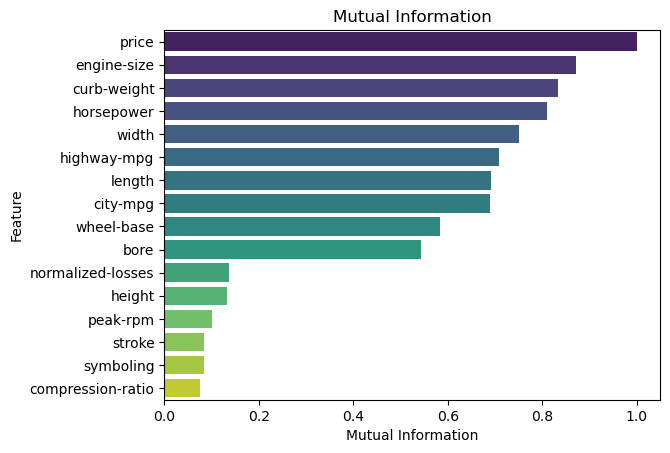

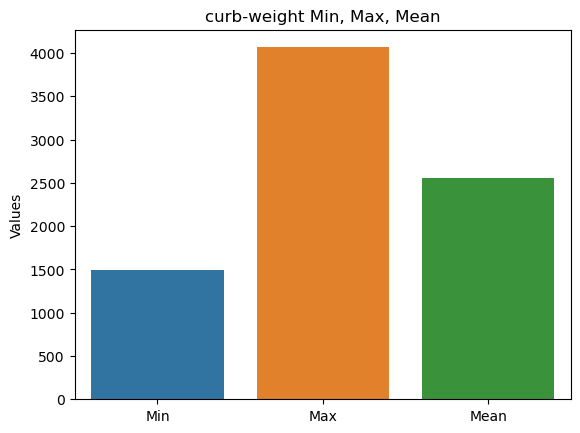

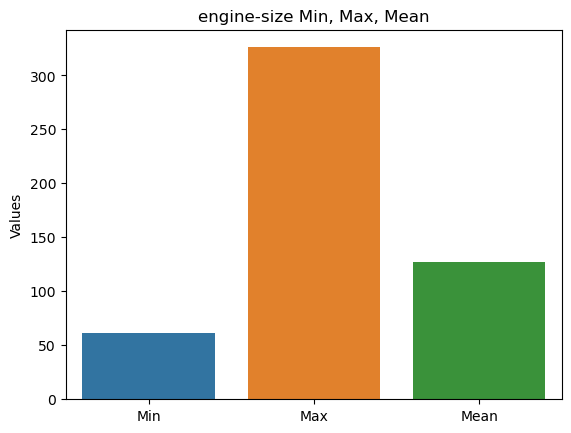

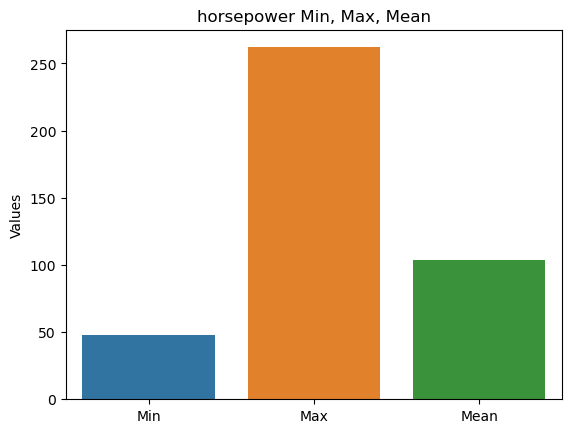

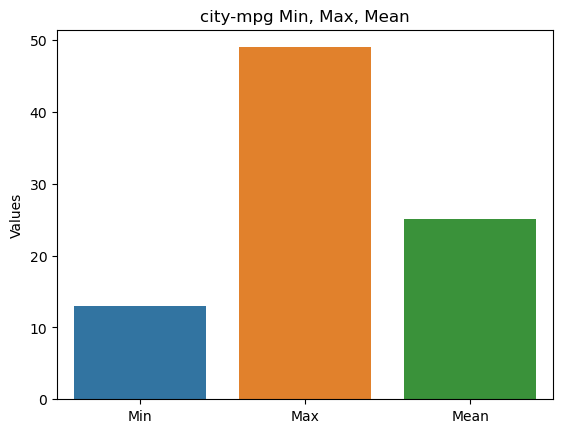

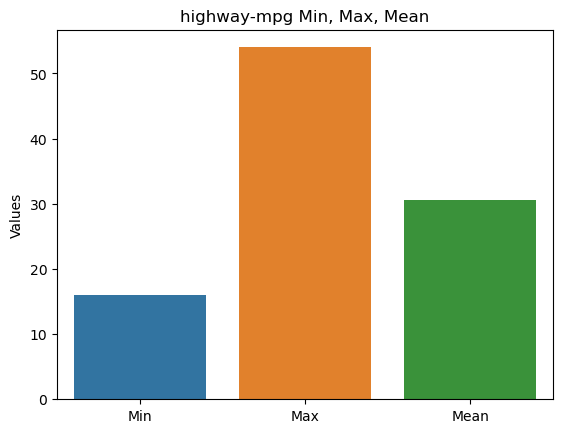

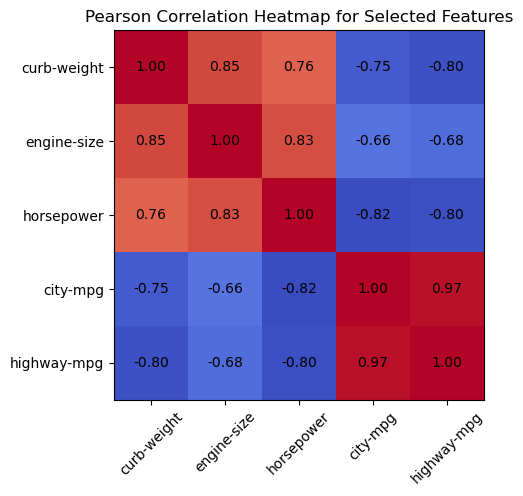

In [19]:
X = df_encoded.drop('price', axis=1)
y = df_encoded['price']
selector = SelectKBest(mutual_info_regression, k=5)
X_selected = selector.fit_transform(X, y)

selected_features = X.columns[selector.get_support()]

print("Mutual Information:")
print(selected_features)

feature_importances = pd.DataFrame({
    'Feature': correlation_scores.keys(),
    'Importance': correlation_scores.values()
})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='viridis', orient='h')
plt.title("Mutual Information")
plt.xlabel("Mutual Information")
plt.ylabel("Feature")
plt.show()

for feature in selected_features:
    sns.barplot(x=['Min', 'Max', 'Mean'], y=[df[feature].min(), df[feature].max(), df[feature].mean()])
    plt.title(f'{feature} Min, Max, Mean')
    plt.ylabel('Values')
    plt.show()

correlation_matrix = df[selected_features].corr()

heatmap = plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')

for i in range(len(selected_features)):
    for j in range(len(selected_features)):
        plt.text(j, i, f'{correlation_matrix.iloc[i, j]:.2f}', ha='center', va='center', color='black')

plt.title("Pearson Correlation Heatmap for Selected Features")
plt.xticks(np.arange(len(selected_features)), selected_features, rotation=45)
plt.yticks(np.arange(len(selected_features)), selected_features)
plt.colorbar(heatmap, fraction=0.046, pad=0.04)
plt.show()


Top 5 Features from Random Forest:
        Feature  Importance
6   curb-weight       0.485
7   engine-size       0.269
14  highway-mpg       0.091
11   horsepower       0.029
13     city-mpg       0.023
Feature Importance with Random Forest:
             Feature  Importance
6        curb-weight       0.485
7        engine-size       0.269
14       highway-mpg       0.091
11        horsepower       0.029
13          city-mpg       0.023
..               ...         ...
33       make_toyota       0.000
34   make_volkswagen       0.000
35        make_volvo       0.000
36     fuel-type_gas       0.000
63  fuel-system_spfi       0.000

[64 rows x 2 columns]


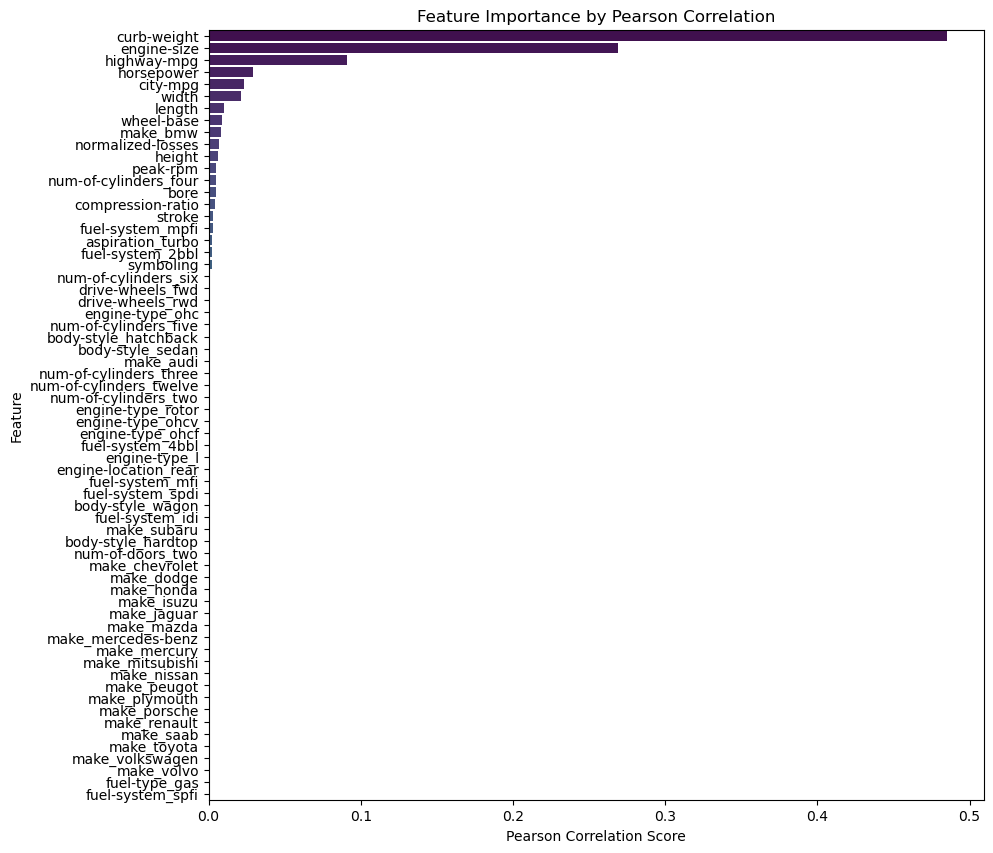

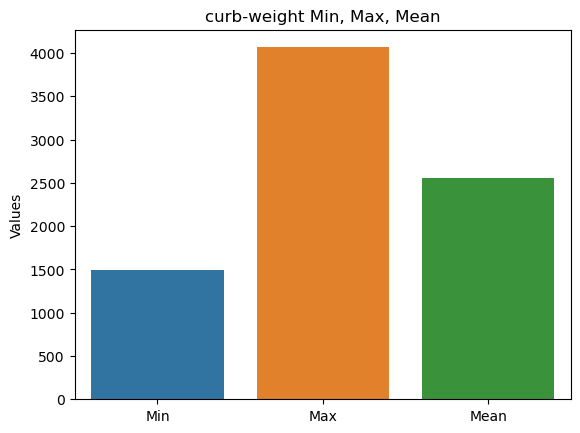

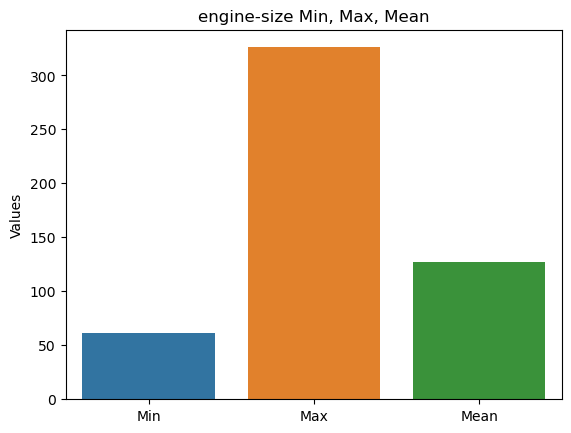

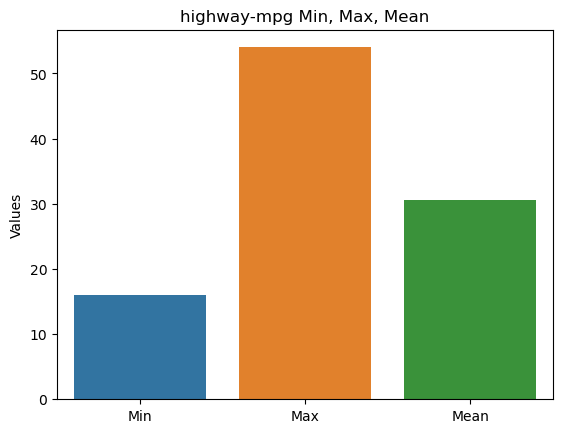

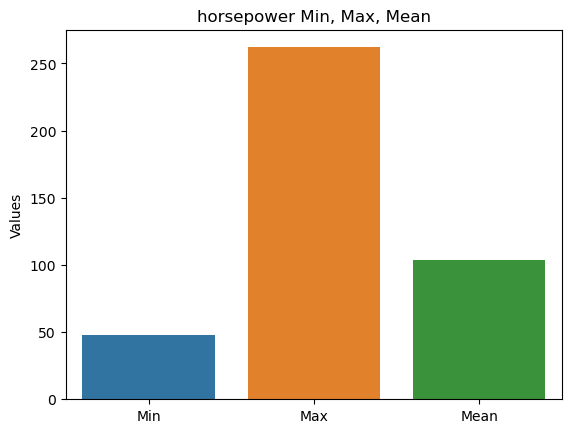

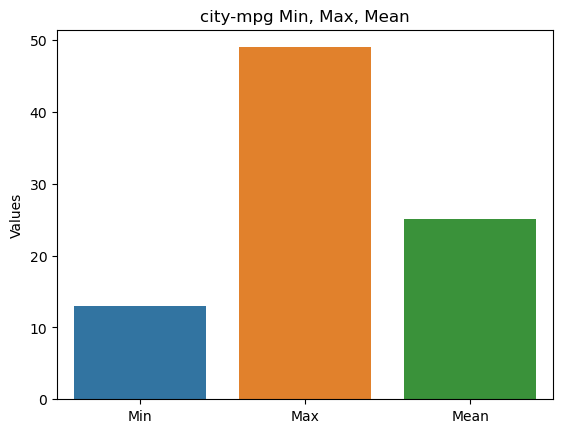

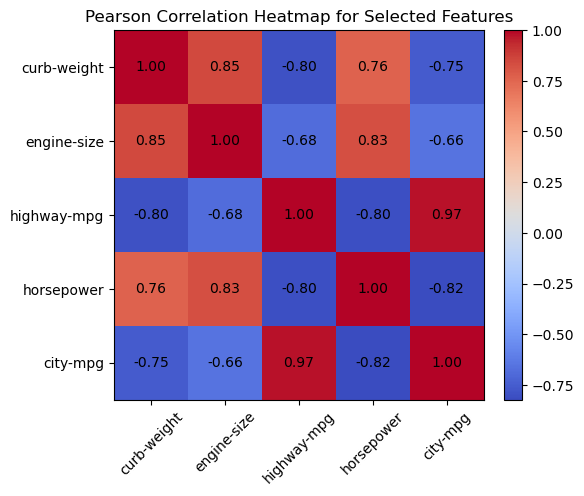

In [14]:
X = df_encoded.drop('price', axis=1)
y = df_encoded['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

feature_importances = np.round(rf_model.feature_importances_, 3)
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

top_features = feature_importance_df.head(5)
print("\nTop 5 Features from Random Forest:")
print(top_features)

print("Feature Importance with Random Forest:")
print(feature_importance_df)

plt.figure(figsize=(10, 10))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis', orient='h')
plt.title("Feature Importance by Pearson Correlation")
plt.xlabel("Pearson Correlation Score")
plt.ylabel("Feature")
plt.show()

selected_features = top_features['Feature'].tolist()
selected_corr = df[selected_features].corr()

for feature in selected_features:
    sns.barplot(x=['Min', 'Max', 'Mean'], y=[df[feature].min(), df[feature].max(), df[feature].mean()])
    plt.title(f'{feature} Min, Max, Mean')
    plt.ylabel('Values')
    plt.show()

heatmap = plt.imshow(selected_corr, cmap='coolwarm', interpolation='nearest')

for i in range(len(selected_features)):
    for j in range(len(selected_features)):
        plt.text(j, i, f'{selected_corr.iloc[i, j]:.2f}', ha='center', va='center', color='black')

plt.title("Pearson Correlation Heatmap for Selected Features")
plt.xticks(np.arange(len(selected_features)), selected_features, rotation=45)
plt.yticks(np.arange(len(selected_features)), selected_features)
plt.colorbar(heatmap, fraction=0.046, pad=0.04)
plt.show()

